# Linear Classifiers

## Fitting a line to data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Supose you performed an experiment when you modify some measurement (var_i) and collect the result of other related measurements (var_d). The values are the following:

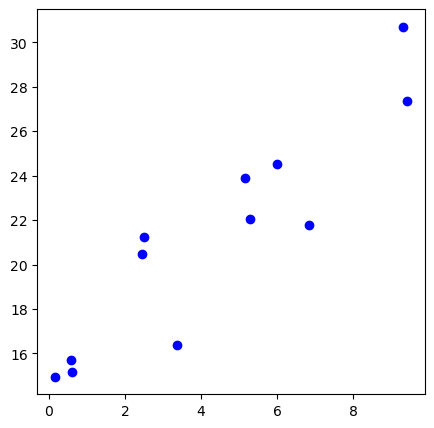

In [2]:
X = np.array([0.60316714, 5.13981077, 0.57754654, 3.35880456, 5.28171939,
        9.41578636, 2.43742198, 5.99075038, 2.49605785, 6.83781763,
        0.16296473, 9.29969598])
Y = np.array([15.15613261, 23.89223832, 15.72151754, 16.35859565, 22.06175073,
        27.36346235, 20.4802553 , 24.54353801, 21.22924112, 21.77229456,
        14.94636364, 30.70479942])
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
plt.show()

Then you are interested in finding which is the relationship between the variables:
- You can gain insight about the phenomena
- You can predict the "y" value for unseen values of "x"

We train to find a good line that fit the data.

In [3]:
def draw_line(line, color, ax, values):
    min_value = np.min(values)
    max_value = np.max(values)
    # Generate x-values
    x = np.linspace(min_value, max_value, 100)  # range of x-values
    y = line(x)
    ax.plot(x, y, color=color)

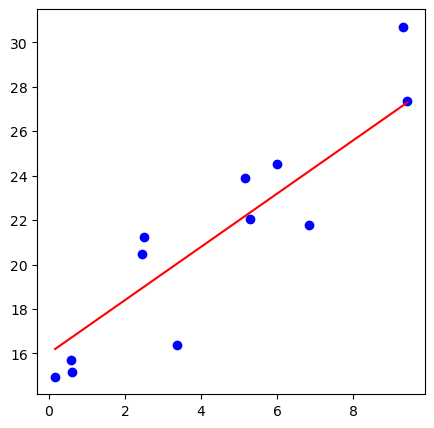

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
line = np.poly1d([1.2, 16])
draw_line(line, 'red', ax, X)
plt.show()

Now it comes the question, is it a good one? Is it the best posible line to fit the data?

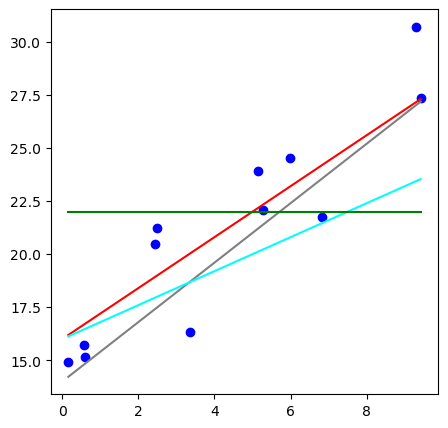

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(np.poly1d([1.2, 16]), 'red', ax, X)
draw_line(np.poly1d([1.4, 14]), 'gray', ax, X)
draw_line(np.poly1d([0.8, 16]), 'cyan', ax, X)
draw_line(np.poly1d([0, 22]), 'green', ax, X)
plt.show()

We can measure now how well the line fits the data by seen how close is it to the data points

In [13]:
distances = []
for x, y in zip(X, Y):
    calculated_y = line(x)
    distance = abs(calculated_y - y)
    distances.append(distance)
print(distances)

[6.029716494166667, 2.706389215833333, 5.464331564166667, 4.827253454166666, 0.8759016258333325, 6.1776132458333315, 0.7055938041666678, 3.3576889058333315, 0.04339201583333363, 0.5864454558333314, 6.239485464166668, 9.518950315833333]


Or we can use a comprehension

In [15]:
distances = [abs(line(x) - y) for x, y in zip(X, Y)]
print(distances)

[6.029716494166667, 2.706389215833333, 5.464331564166667, 4.827253454166666, 0.8759016258333325, 6.1776132458333315, 0.7055938041666678, 3.3576889058333315, 0.04339201583333363, 0.5864454558333314, 6.239485464166668, 9.518950315833333]


Since we want to penalize larger divergences, we square the terms (additionally, the *abs* have some nasty mathematical properties).

In [20]:
distances = [(line(x) - y)**2 for x, y in zip(X, Y)]

if we add all the distances, the result is named **sum of squared residuals (SSR)**, because the **residuals** are the differences between the real and estimated values.

In [21]:
sum(distances)

277.4327605321405

Now lets create a function for performing the evaluation

In [22]:
def sum_sq_res(line, X, Y):
    return sum((line(x) - y)**2 for x, y in zip(X, Y))

sum_sq_res(line, X, Y)

277.4327605321405

Lets evaluate the functions we used before

red 49.232492444404805
gray 59.52279969129367
cyan 125.26264915852755
green 285.38686070637516


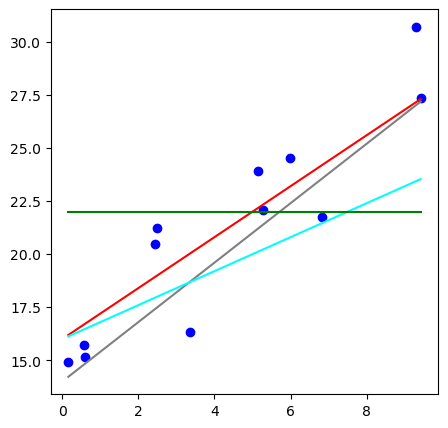

In [24]:
all_lines = [
    (np.poly1d([1.2, 16]), 'red'), 
    (np.poly1d([1.4, 14]), 'gray'),
    (np.poly1d([0.8, 16]), 'cyan'),
    (np.poly1d([0, 22]), 'green'),
]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
for l, color in all_lines:
    draw_line(l, color, ax, X)
    print(color, sum_sq_res(l, X, Y))
plt.show()

As you can see, the better the line fit the data, the smaller value it have on the SSR. 

Lets try to find the line with the minimal value. This method is called **Least Squares**. We need to find two values:
- The curve slope, that controls the angle with respect to the horizontal axis
- The curve intercept, that controls the point where the curve cuts the vertical axis.

Consider the horizontal line with the average value. This is not a good one, but since it is based on data, will be our starting point.



21.185849104166667


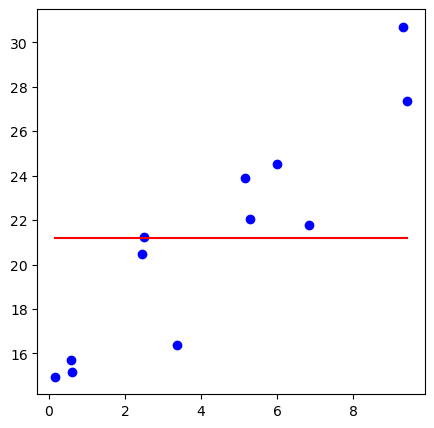

In [25]:
b = np.average(Y)
print(b)
line = np.poly1d([0, b])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

Now we explore the influence of the slope in the SSR

In [29]:
for slope in np.arange(-4, 4, 0.1):
    line = np.poly1d([slope, b])
    ssr = sum_sq_res(line, X, Y)
    print(slope, ssr)

-4.0 6967.60601848117
-3.9 6669.203555827606
-3.8 6377.526638364034
-3.6999999999999997 6092.575266090453
-3.5999999999999996 5814.349439006862
-3.4999999999999996 5542.849157113265
-3.3999999999999995 5278.074420409659
-3.2999999999999994 5020.0252288960455
-3.1999999999999993 4768.701582572424
-3.099999999999999 4524.103481438793
-2.999999999999999 4286.230925495154
-2.899999999999999 4055.083914741507
-2.799999999999999 3830.662449177852
-2.699999999999999 3612.966528804189
-2.5999999999999988 3401.996153620516
-2.4999999999999987 3197.751323626836
-2.3999999999999986 3000.232038823147
-2.2999999999999985 2809.43829920945
-2.1999999999999984 2625.3701047857453
-2.0999999999999983 2448.0274555520323
-1.9999999999999982 2277.41035150831
-1.8999999999999981 2113.5187926545805
-1.799999999999998 1956.3527789908424
-1.699999999999998 1805.912310517096
-1.5999999999999979 1662.1973872333415
-1.4999999999999978 1525.2080091395783
-1.3999999999999977 1394.944176235807
-1.2999999999999976 12

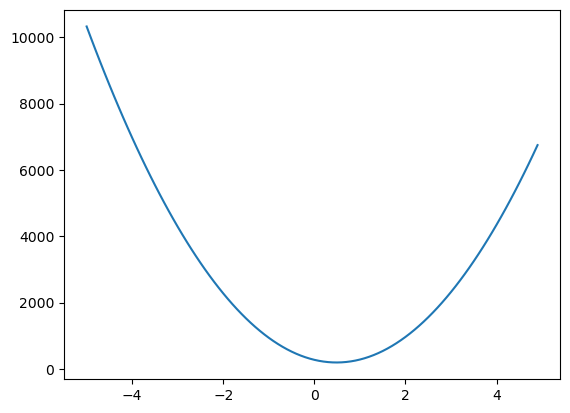

In [34]:
# using a comprehension
points = [(slope, sum_sq_res(np.poly1d([slope, b]), X, Y)) for slope in np.arange(-5, 5, 0.1)]
ssrs = np.array(points)
plt.plot(ssrs[:, 0],ssrs[:, 1])
plt.show()


The ssr function has a derivative that is easy to calculate, allowing us to directly locate the minimum by finding the point where the derivative equals zero.

For this example, since we have a computer, we can directly get the slope with lowest ssr value:

In [38]:
min_row_index = np.argmin(ssrs[:, 1])
min_slope = ssrs[min_row_index, 0]
min_slope

0.49999999999998046

21.185849104166667


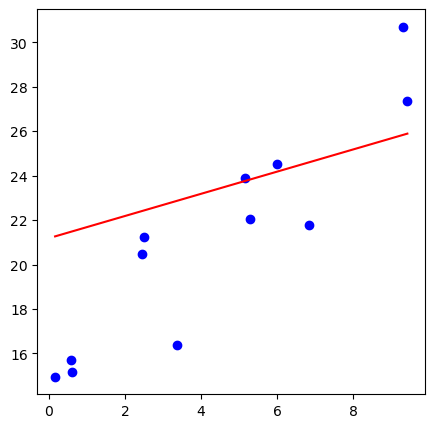

In [39]:
b = np.average(Y)
print(b)
line = np.poly1d([min_slope, b])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

We can do a similar operation in both parameters simultaneously to find the best line.

In [58]:
points = [(slope, c, sum_sq_res(np.poly1d([slope, c]), X, Y)) 
          for slope in np.arange(-5, 5, 0.1) 
          for c in np.arange(10, 20, 0.1)]

In [59]:
points = np.array(points)
points

array([[-5.00000000e+00,  1.00000000e+01,  1.75950850e+04],
       [-5.00000000e+00,  1.01000000e+01,  1.75167575e+04],
       [-5.00000000e+00,  1.02000000e+01,  1.74386699e+04],
       ...,
       [ 4.90000000e+00,  1.97000000e+01,  6.02212813e+03],
       [ 4.90000000e+00,  1.98000000e+01,  6.06925160e+03],
       [ 4.90000000e+00,  1.99000000e+01,  6.11661508e+03]])

Lets plot the SSR values with respect to slope and c

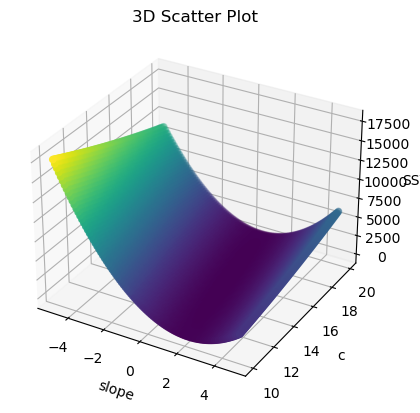

In [67]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2])

# Set labels and title
ax.set_xlabel('slope')
ax.set_ylabel('c')
ax.set_zlabel('SSV')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


And get the lowest value

In [61]:
min_row_index = np.argmin(points[:,2])
min_slope, min_c, ssr = points[min_row_index]
min_slope, min_c, ssr

(1.3999999999999773, 15.199999999999982, 43.2315310128937)

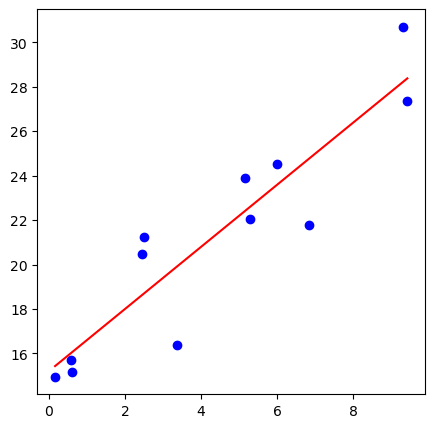

In [62]:
line = np.poly1d([min_slope, min_c])

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='Random Points')
draw_line(line, 'red', ax, X)

Summarizing:
- To fit the model to the available data we need to minimize the sum of squared residual from the model and the data
- To do this, we calculate the derivative of the SSR with respect to the model parameters
- The point where the derivative is zero is the one that minimizes the SSR, so it must be used for the final model